# Importing Required Libraries

In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='iCo9tiNClqIg-gKzpS-1dJb-CbJl2jibKgl-YvTJCwJg',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'webphising-donotdelete-pr-fuph26enrbbq6f'
object_key = 'dataset_website.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Shape of dataframe

data.shape

(11055, 32)

In [4]:
#Listing the features of the dataset

data.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

# Handling the Null Values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [6]:
# nunique value in columns

data.nunique()

index                          11055
having_IPhaving_IP_Address         2
URLURL_Length                      3
Shortining_Service                 2
having_At_Symbol                   2
double_slash_redirecting           2
Prefix_Suffix                      2
having_Sub_Domain                  3
SSLfinal_State                     3
Domain_registeration_length        2
Favicon                            2
port                               2
HTTPS_token                        2
Request_URL                        2
URL_of_Anchor                      3
Links_in_tags                      3
SFH                                3
Submitting_to_email                2
Abnormal_URL                       2
Redirect                           2
on_mouseover                       2
RightClick                         2
popUpWidnow                        2
Iframe                             2
age_of_domain                      2
DNSRecord                          2
web_traffic                        3
P

In [7]:
#droping index column

data = data.drop(['index'],axis = 1)

In [8]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IPhaving_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URLURL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


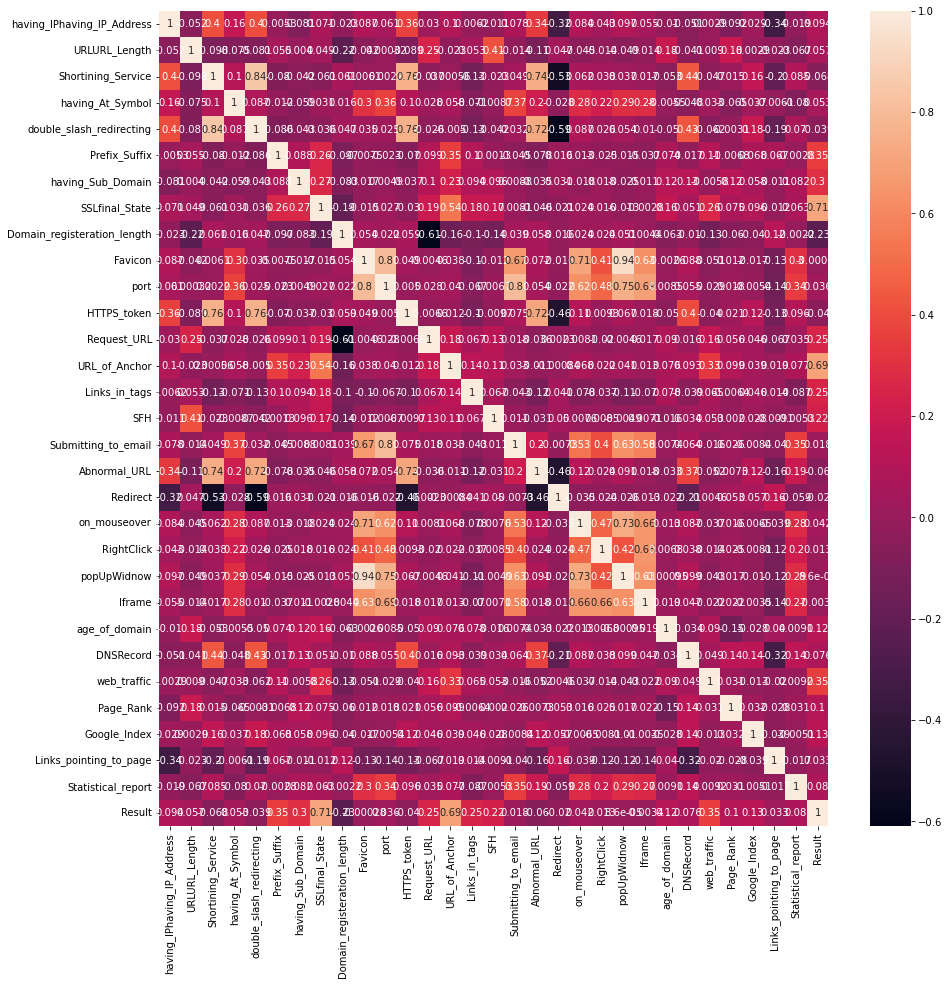

In [9]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

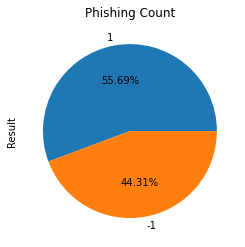

In [10]:
# Phishing Count in pie chart

data['Result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## Splitting the dataset into train and test sets: 80-20 split

In [11]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["Result"],axis =1)
y = data["Result"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8844, 30), (8844,), (2211, 30), (2211,))

In [13]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

Logistic Regression

In [14]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [15]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [16]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))


Logistic Regression : Accuracy on training Data: 0.929
Logistic Regression : Accuracy on test Data: 0.924

Logistic Regression : f1_score on training Data: 0.937
Logistic Regression : f1_score on test Data: 0.933

Logistic Regression : Recall on training Data: 0.947
Logistic Regression : Recall on test Data: 0.939

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.928


In [17]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [18]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

K-NEAREST NEIGHBOR

In [19]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=2)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [20]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [21]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))


K-Nearest Neighbors : Accuracy on training Data: 0.977
K-Nearest Neighbors : Accuracy on test Data: 0.944

K-Nearest Neighbors : f1_score on training Data: 0.979
K-Nearest Neighbors : f1_score on test Data: 0.950

K-Nearest Neighborsn : Recall on training Data: 0.962
Logistic Regression : Recall on test Data: 0.929

K-Nearest Neighbors : precision on training Data: 0.996
K-Nearest Neighbors : precision on test Data: 0.971


In [22]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.91      0.96      0.94       956
           1       0.97      0.93      0.95      1255

    accuracy                           0.94      2211
   macro avg       0.94      0.95      0.94      2211
weighted avg       0.95      0.94      0.94      2211



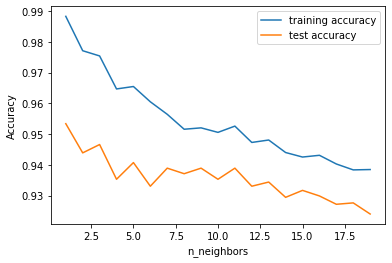

In [23]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [24]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [25]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [26]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [27]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))


Support Vector Machine : Accuracy on training Data: 0.971
Support Vector Machine : Accuracy on test Data: 0.957

Support Vector Machine : f1_score on training Data: 0.974
Support Vector Machine : f1_score on test Data: 0.963

Support Vector Machine : Recall on training Data: 0.982
Support Vector Machine : Recall on test Data: 0.973

Support Vector Machine : precision on training Data: 0.966
Support Vector Machine : precision on test Data: 0.952


In [28]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       956
           1       0.95      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.95      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [29]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [30]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [31]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [32]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))


Naive Bayes Classifier : Accuracy on training Data: 0.607
Naive Bayes Classifier : Accuracy on test Data: 0.583

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.420

Naive Bayes Classifier : Recall on training Data: 0.291
Naive Bayes Classifier : Recall on test Data: 0.266

Naive Bayes Classifier : precision on training Data: 0.996
Naive Bayes Classifier : precision on test Data: 0.997


In [33]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       956
           1       0.95      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.95      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [34]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [35]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [36]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [37]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))


Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.958

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.963

Decision Tree : Recall on training Data: 0.992
Decision Tree : Recall on test Data: 0.964

Decision Tree : precision on training Data: 0.991
Decision Tree : precision on test Data: 0.962


In [38]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       956
           1       0.96      0.96      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



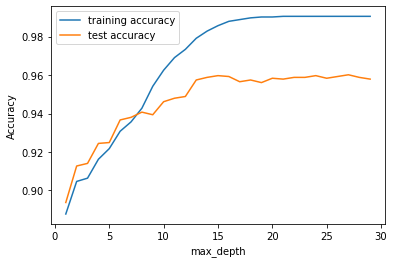

In [39]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [40]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

In [41]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [42]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [43]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))


Random Forest : Accuracy on training Data: 0.989
Random Forest : Accuracy on test Data: 0.961

Random Forest : f1_score on training Data: 0.990
Random Forest : f1_score on test Data: 0.966

Random Forest : Recall on training Data: 0.992
Random Forest : Recall on test Data: 0.969

Random Forest : precision on training Data: 0.989
Random Forest : precision on test Data: 0.962


In [44]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.95       956
           1       0.96      0.97      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



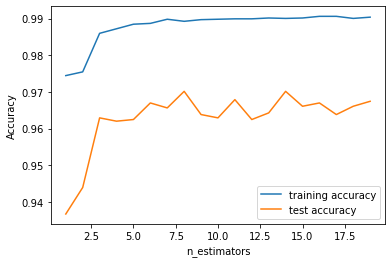

In [45]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [46]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [47]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [48]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [49]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))


Gradient Boosting Classifier : Accuracy on training Data: 0.987
Gradient Boosting Classifier : Accuracy on test Data: 0.971

Gradient Boosting Classifier : f1_score on training Data: 0.989
Gradient Boosting Classifier : f1_score on test Data: 0.975

Gradient Boosting Classifier : Recall on training Data: 0.992
Gradient Boosting Classifier : Recall on test Data: 0.988

Gradient Boosting Classifier : precision on training Data: 0.985
Gradient Boosting Classifier : precision on test Data: 0.962


In [50]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.98      0.95      0.97       956
           1       0.96      0.99      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



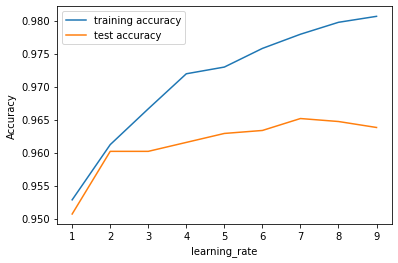

In [51]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

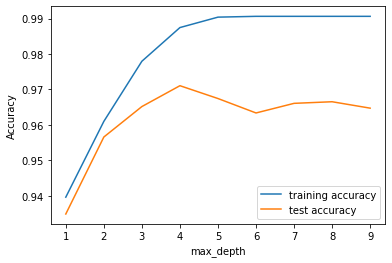

In [52]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [53]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [54]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [55]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5480538	total: 52.5ms	remaining: 52.4s
1:	learn: 0.4337748	total: 59.8ms	remaining: 29.9s
2:	learn: 0.3697514	total: 65.8ms	remaining: 21.9s
3:	learn: 0.3105084	total: 70.1ms	remaining: 17.5s
4:	learn: 0.2715007	total: 74.5ms	remaining: 14.8s
5:	learn: 0.2433223	total: 77.7ms	remaining: 12.9s
6:	learn: 0.2254893	total: 80.7ms	remaining: 11.4s
7:	learn: 0.2082963	total: 85.7ms	remaining: 10.6s
8:	learn: 0.1975992	total: 90.4ms	remaining: 9.96s
9:	learn: 0.1868770	total: 94.4ms	remaining: 9.34s
10:	learn: 0.1795134	total: 99ms	remaining: 8.9s
11:	learn: 0.1749100	total: 103ms	remaining: 8.46s
12:	learn: 0.1685586	total: 108ms	remaining: 8.19s
13:	learn: 0.1642018	total: 113ms	remaining: 7.97s
14:	learn: 0.1599999	total: 117ms	remaining: 7.65s
15:	learn: 0.1563166	total: 120ms	remaining: 7.37s
16:	learn: 0.1538434	total: 123ms	remaining: 7.12s
17:	learn: 0.1515084	total: 126ms	remaining: 6.89s
18:	learn: 0.1476302	total: 130ms	remaining: 6.7s
19:	learn: 0.1453111	total: 133ms	

166:	learn: 0.0550103	total: 696ms	remaining: 3.47s
167:	learn: 0.0548806	total: 701ms	remaining: 3.47s
168:	learn: 0.0546207	total: 709ms	remaining: 3.48s
169:	learn: 0.0544744	total: 713ms	remaining: 3.48s
170:	learn: 0.0542500	total: 718ms	remaining: 3.48s
171:	learn: 0.0540693	total: 722ms	remaining: 3.48s
172:	learn: 0.0538623	total: 727ms	remaining: 3.47s
173:	learn: 0.0537364	total: 731ms	remaining: 3.47s
174:	learn: 0.0536432	total: 735ms	remaining: 3.46s
175:	learn: 0.0534786	total: 739ms	remaining: 3.46s
176:	learn: 0.0532180	total: 743ms	remaining: 3.45s
177:	learn: 0.0528518	total: 747ms	remaining: 3.45s
178:	learn: 0.0526563	total: 750ms	remaining: 3.44s
179:	learn: 0.0525527	total: 754ms	remaining: 3.44s
180:	learn: 0.0524322	total: 758ms	remaining: 3.43s
181:	learn: 0.0522636	total: 762ms	remaining: 3.42s
182:	learn: 0.0521263	total: 766ms	remaining: 3.42s
183:	learn: 0.0520370	total: 769ms	remaining: 3.41s
184:	learn: 0.0518513	total: 773ms	remaining: 3.41s
185:	learn: 

364:	learn: 0.0347262	total: 1.44s	remaining: 2.5s
365:	learn: 0.0346668	total: 1.44s	remaining: 2.5s
366:	learn: 0.0345697	total: 1.45s	remaining: 2.5s
367:	learn: 0.0345439	total: 1.45s	remaining: 2.49s
368:	learn: 0.0344700	total: 1.45s	remaining: 2.49s
369:	learn: 0.0344131	total: 1.46s	remaining: 2.48s
370:	learn: 0.0343867	total: 1.46s	remaining: 2.48s
371:	learn: 0.0343265	total: 1.47s	remaining: 2.47s
372:	learn: 0.0342398	total: 1.47s	remaining: 2.47s
373:	learn: 0.0341798	total: 1.47s	remaining: 2.46s
374:	learn: 0.0341053	total: 1.48s	remaining: 2.46s
375:	learn: 0.0340509	total: 1.48s	remaining: 2.45s
376:	learn: 0.0339850	total: 1.48s	remaining: 2.45s
377:	learn: 0.0339100	total: 1.49s	remaining: 2.44s
378:	learn: 0.0338534	total: 1.49s	remaining: 2.44s
379:	learn: 0.0337912	total: 1.49s	remaining: 2.44s
380:	learn: 0.0337197	total: 1.5s	remaining: 2.43s
381:	learn: 0.0336963	total: 1.5s	remaining: 2.42s
382:	learn: 0.0336240	total: 1.5s	remaining: 2.42s
383:	learn: 0.0335

532:	learn: 0.0293817	total: 2.02s	remaining: 1.77s
533:	learn: 0.0293742	total: 2.02s	remaining: 1.76s
534:	learn: 0.0293538	total: 2.02s	remaining: 1.76s
535:	learn: 0.0293179	total: 2.03s	remaining: 1.75s
536:	learn: 0.0292872	total: 2.03s	remaining: 1.75s
537:	learn: 0.0292651	total: 2.03s	remaining: 1.75s
538:	learn: 0.0292397	total: 2.04s	remaining: 1.74s
539:	learn: 0.0292252	total: 2.04s	remaining: 1.74s
540:	learn: 0.0291830	total: 2.04s	remaining: 1.73s
541:	learn: 0.0291585	total: 2.04s	remaining: 1.73s
542:	learn: 0.0291480	total: 2.05s	remaining: 1.72s
543:	learn: 0.0291365	total: 2.05s	remaining: 1.72s
544:	learn: 0.0291115	total: 2.05s	remaining: 1.72s
545:	learn: 0.0290622	total: 2.06s	remaining: 1.71s
546:	learn: 0.0290212	total: 2.06s	remaining: 1.71s
547:	learn: 0.0290212	total: 2.06s	remaining: 1.7s
548:	learn: 0.0290211	total: 2.06s	remaining: 1.7s
549:	learn: 0.0290212	total: 2.07s	remaining: 1.69s
550:	learn: 0.0290095	total: 2.07s	remaining: 1.69s
551:	learn: 0.

727:	learn: 0.0270378	total: 2.6s	remaining: 972ms
728:	learn: 0.0270163	total: 2.6s	remaining: 968ms
729:	learn: 0.0269752	total: 2.61s	remaining: 965ms
730:	learn: 0.0269752	total: 2.61s	remaining: 961ms
731:	learn: 0.0269752	total: 2.61s	remaining: 957ms
732:	learn: 0.0269752	total: 2.62s	remaining: 954ms
733:	learn: 0.0269749	total: 2.62s	remaining: 950ms
734:	learn: 0.0269749	total: 2.63s	remaining: 947ms
735:	learn: 0.0269749	total: 2.63s	remaining: 943ms
736:	learn: 0.0269749	total: 2.64s	remaining: 942ms
737:	learn: 0.0269749	total: 2.64s	remaining: 939ms
738:	learn: 0.0269748	total: 2.65s	remaining: 935ms
739:	learn: 0.0269703	total: 2.66s	remaining: 936ms
740:	learn: 0.0269448	total: 2.67s	remaining: 932ms
741:	learn: 0.0269444	total: 2.67s	remaining: 929ms
742:	learn: 0.0269248	total: 2.68s	remaining: 927ms
743:	learn: 0.0269248	total: 2.68s	remaining: 923ms
744:	learn: 0.0269245	total: 2.69s	remaining: 919ms
745:	learn: 0.0269245	total: 2.69s	remaining: 915ms
746:	learn: 0.

901:	learn: 0.0261287	total: 3.19s	remaining: 346ms
902:	learn: 0.0261287	total: 3.19s	remaining: 343ms
903:	learn: 0.0261286	total: 3.19s	remaining: 339ms
904:	learn: 0.0261286	total: 3.19s	remaining: 335ms
905:	learn: 0.0261286	total: 3.2s	remaining: 332ms
906:	learn: 0.0261285	total: 3.2s	remaining: 328ms
907:	learn: 0.0261285	total: 3.21s	remaining: 325ms
908:	learn: 0.0261286	total: 3.21s	remaining: 321ms
909:	learn: 0.0261285	total: 3.21s	remaining: 318ms
910:	learn: 0.0261281	total: 3.21s	remaining: 314ms
911:	learn: 0.0261159	total: 3.22s	remaining: 311ms
912:	learn: 0.0261016	total: 3.22s	remaining: 307ms
913:	learn: 0.0260905	total: 3.23s	remaining: 303ms
914:	learn: 0.0260905	total: 3.23s	remaining: 300ms
915:	learn: 0.0260905	total: 3.23s	remaining: 296ms
916:	learn: 0.0260905	total: 3.23s	remaining: 293ms
917:	learn: 0.0260905	total: 3.24s	remaining: 289ms
918:	learn: 0.0260904	total: 3.25s	remaining: 286ms
919:	learn: 0.0260904	total: 3.25s	remaining: 282ms
920:	learn: 0.

In [56]:

#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)

In [57]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))


CatBoost Classifier : Accuracy on training Data: 0.990
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.991
CatBoost Classifier : f1_score on test Data: 0.976

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.988

CatBoost Classifier : precision on training Data: 0.987
CatBoost Classifier : precision on test Data: 0.964


In [58]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.95      0.97       956
           1       0.96      0.99      0.98      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [59]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))

0:	learn: 0.5480538	total: 3.1ms	remaining: 3.09s
1:	learn: 0.4337748	total: 10ms	remaining: 5s
2:	learn: 0.3697514	total: 13.6ms	remaining: 4.53s
3:	learn: 0.3105084	total: 17.1ms	remaining: 4.26s
4:	learn: 0.2715007	total: 21.1ms	remaining: 4.19s
5:	learn: 0.2433223	total: 24.6ms	remaining: 4.08s
6:	learn: 0.2254893	total: 28ms	remaining: 3.98s
7:	learn: 0.2082963	total: 40ms	remaining: 4.96s
8:	learn: 0.1975992	total: 43.9ms	remaining: 4.83s
9:	learn: 0.1868770	total: 47.3ms	remaining: 4.68s
10:	learn: 0.1795134	total: 50.7ms	remaining: 4.56s
11:	learn: 0.1749100	total: 53.7ms	remaining: 4.42s
12:	learn: 0.1685586	total: 57.2ms	remaining: 4.34s
13:	learn: 0.1642018	total: 61.1ms	remaining: 4.3s
14:	learn: 0.1599999	total: 63.9ms	remaining: 4.2s
15:	learn: 0.1563166	total: 67ms	remaining: 4.12s
16:	learn: 0.1538434	total: 70.1ms	remaining: 4.05s
17:	learn: 0.1515084	total: 73.1ms	remaining: 3.99s
18:	learn: 0.1476302	total: 76.1ms	remaining: 3.93s
19:	learn: 0.1453111	total: 79.8ms	r

191:	learn: 0.0507992	total: 697ms	remaining: 2.93s
192:	learn: 0.0507433	total: 700ms	remaining: 2.93s
193:	learn: 0.0504642	total: 704ms	remaining: 2.92s
194:	learn: 0.0502657	total: 707ms	remaining: 2.92s
195:	learn: 0.0501936	total: 710ms	remaining: 2.91s
196:	learn: 0.0501112	total: 719ms	remaining: 2.93s
197:	learn: 0.0499960	total: 722ms	remaining: 2.92s
198:	learn: 0.0498892	total: 725ms	remaining: 2.92s
199:	learn: 0.0496267	total: 728ms	remaining: 2.91s
200:	learn: 0.0496104	total: 730ms	remaining: 2.9s
201:	learn: 0.0494922	total: 733ms	remaining: 2.9s
202:	learn: 0.0493757	total: 736ms	remaining: 2.89s
203:	learn: 0.0491855	total: 739ms	remaining: 2.88s
204:	learn: 0.0490367	total: 742ms	remaining: 2.88s
205:	learn: 0.0489342	total: 746ms	remaining: 2.88s
206:	learn: 0.0488345	total: 750ms	remaining: 2.87s
207:	learn: 0.0486681	total: 755ms	remaining: 2.87s
208:	learn: 0.0485686	total: 759ms	remaining: 2.87s
209:	learn: 0.0484591	total: 763ms	remaining: 2.87s
210:	learn: 0.

358:	learn: 0.0351580	total: 1.29s	remaining: 2.3s
359:	learn: 0.0350381	total: 1.29s	remaining: 2.29s
360:	learn: 0.0350156	total: 1.29s	remaining: 2.29s
361:	learn: 0.0349028	total: 1.3s	remaining: 2.29s
362:	learn: 0.0348739	total: 1.3s	remaining: 2.28s
363:	learn: 0.0348166	total: 1.31s	remaining: 2.28s
364:	learn: 0.0347262	total: 1.31s	remaining: 2.28s
365:	learn: 0.0346668	total: 1.31s	remaining: 2.27s
366:	learn: 0.0345697	total: 1.32s	remaining: 2.27s
367:	learn: 0.0345439	total: 1.32s	remaining: 2.27s
368:	learn: 0.0344700	total: 1.32s	remaining: 2.26s
369:	learn: 0.0344131	total: 1.33s	remaining: 2.26s
370:	learn: 0.0343867	total: 1.33s	remaining: 2.26s
371:	learn: 0.0343265	total: 1.33s	remaining: 2.25s
372:	learn: 0.0342398	total: 1.34s	remaining: 2.25s
373:	learn: 0.0341798	total: 1.34s	remaining: 2.25s
374:	learn: 0.0341053	total: 1.34s	remaining: 2.24s
375:	learn: 0.0340509	total: 1.35s	remaining: 2.24s
376:	learn: 0.0339850	total: 1.35s	remaining: 2.23s
377:	learn: 0.0

524:	learn: 0.0295364	total: 1.91s	remaining: 1.73s
525:	learn: 0.0295050	total: 1.92s	remaining: 1.73s
526:	learn: 0.0294804	total: 1.92s	remaining: 1.72s
527:	learn: 0.0294717	total: 1.92s	remaining: 1.72s
528:	learn: 0.0294511	total: 1.93s	remaining: 1.72s
529:	learn: 0.0294331	total: 1.93s	remaining: 1.71s
530:	learn: 0.0293963	total: 1.94s	remaining: 1.71s
531:	learn: 0.0293963	total: 1.94s	remaining: 1.71s
532:	learn: 0.0293817	total: 1.94s	remaining: 1.7s
533:	learn: 0.0293742	total: 1.95s	remaining: 1.7s
534:	learn: 0.0293538	total: 1.95s	remaining: 1.7s
535:	learn: 0.0293179	total: 1.95s	remaining: 1.69s
536:	learn: 0.0292872	total: 1.96s	remaining: 1.69s
537:	learn: 0.0292651	total: 1.96s	remaining: 1.68s
538:	learn: 0.0292397	total: 1.96s	remaining: 1.68s
539:	learn: 0.0292252	total: 1.97s	remaining: 1.67s
540:	learn: 0.0291830	total: 1.97s	remaining: 1.67s
541:	learn: 0.0291585	total: 1.97s	remaining: 1.67s
542:	learn: 0.0291480	total: 1.98s	remaining: 1.66s
543:	learn: 0.0

683:	learn: 0.0273472	total: 2.46s	remaining: 1.14s
684:	learn: 0.0273472	total: 2.46s	remaining: 1.13s
685:	learn: 0.0273472	total: 2.46s	remaining: 1.13s
686:	learn: 0.0273472	total: 2.47s	remaining: 1.12s
687:	learn: 0.0273318	total: 2.47s	remaining: 1.12s
688:	learn: 0.0273317	total: 2.47s	remaining: 1.12s
689:	learn: 0.0273317	total: 2.48s	remaining: 1.11s
690:	learn: 0.0273316	total: 2.48s	remaining: 1.11s
691:	learn: 0.0273316	total: 2.48s	remaining: 1.1s
692:	learn: 0.0273293	total: 2.49s	remaining: 1.1s
693:	learn: 0.0272748	total: 2.49s	remaining: 1.1s
694:	learn: 0.0272560	total: 2.49s	remaining: 1.09s
695:	learn: 0.0272354	total: 2.5s	remaining: 1.09s
696:	learn: 0.0272354	total: 2.5s	remaining: 1.09s
697:	learn: 0.0272263	total: 2.5s	remaining: 1.08s
698:	learn: 0.0272264	total: 2.51s	remaining: 1.08s
699:	learn: 0.0272264	total: 2.51s	remaining: 1.08s
700:	learn: 0.0272264	total: 2.52s	remaining: 1.07s
701:	learn: 0.0272263	total: 2.52s	remaining: 1.07s
702:	learn: 0.0272

847:	learn: 0.0262435	total: 3.05s	remaining: 546ms
848:	learn: 0.0262435	total: 3.05s	remaining: 542ms
849:	learn: 0.0262435	total: 3.05s	remaining: 539ms
850:	learn: 0.0262435	total: 3.06s	remaining: 535ms
851:	learn: 0.0262435	total: 3.06s	remaining: 531ms
852:	learn: 0.0262434	total: 3.06s	remaining: 528ms
853:	learn: 0.0262434	total: 3.06s	remaining: 524ms
854:	learn: 0.0262434	total: 3.07s	remaining: 520ms
855:	learn: 0.0262433	total: 3.07s	remaining: 517ms
856:	learn: 0.0262434	total: 3.07s	remaining: 513ms
857:	learn: 0.0262433	total: 3.08s	remaining: 509ms
858:	learn: 0.0262433	total: 3.08s	remaining: 506ms
859:	learn: 0.0262433	total: 3.08s	remaining: 502ms
860:	learn: 0.0262432	total: 3.09s	remaining: 499ms
861:	learn: 0.0262432	total: 3.09s	remaining: 495ms
862:	learn: 0.0262431	total: 3.09s	remaining: 491ms
863:	learn: 0.0262431	total: 3.1s	remaining: 488ms
864:	learn: 0.0262431	total: 3.1s	remaining: 484ms
865:	learn: 0.0262431	total: 3.1s	remaining: 480ms
866:	learn: 0.0

13:	learn: 0.1300724	total: 45.2ms	remaining: 3.19s
14:	learn: 0.1271959	total: 48.6ms	remaining: 3.19s
15:	learn: 0.1247965	total: 53.3ms	remaining: 3.27s
16:	learn: 0.1214855	total: 58.1ms	remaining: 3.36s
17:	learn: 0.1194271	total: 64.9ms	remaining: 3.54s
18:	learn: 0.1176205	total: 69.6ms	remaining: 3.59s
19:	learn: 0.1159351	total: 73.8ms	remaining: 3.61s
20:	learn: 0.1138314	total: 77.3ms	remaining: 3.6s
21:	learn: 0.1106451	total: 80.1ms	remaining: 3.56s
22:	learn: 0.1084412	total: 84.4ms	remaining: 3.59s
23:	learn: 0.1071659	total: 87.2ms	remaining: 3.54s
24:	learn: 0.1056315	total: 90.1ms	remaining: 3.51s
25:	learn: 0.1043331	total: 92.8ms	remaining: 3.48s
26:	learn: 0.1041459	total: 94.7ms	remaining: 3.41s
27:	learn: 0.1012775	total: 97.7ms	remaining: 3.39s
28:	learn: 0.0999162	total: 101ms	remaining: 3.39s
29:	learn: 0.0974519	total: 104ms	remaining: 3.37s
30:	learn: 0.0958165	total: 107ms	remaining: 3.35s
31:	learn: 0.0945296	total: 110ms	remaining: 3.34s
32:	learn: 0.0934

176:	learn: 0.0357262	total: 591ms	remaining: 2.75s
177:	learn: 0.0357262	total: 595ms	remaining: 2.75s
178:	learn: 0.0357260	total: 599ms	remaining: 2.75s
179:	learn: 0.0357260	total: 602ms	remaining: 2.74s
180:	learn: 0.0357259	total: 605ms	remaining: 2.74s
181:	learn: 0.0357258	total: 608ms	remaining: 2.73s
182:	learn: 0.0357255	total: 610ms	remaining: 2.72s
183:	learn: 0.0357256	total: 613ms	remaining: 2.72s
184:	learn: 0.0357255	total: 616ms	remaining: 2.71s
185:	learn: 0.0357255	total: 619ms	remaining: 2.71s
186:	learn: 0.0357212	total: 622ms	remaining: 2.71s
187:	learn: 0.0356241	total: 626ms	remaining: 2.71s
188:	learn: 0.0356241	total: 629ms	remaining: 2.7s
189:	learn: 0.0356234	total: 633ms	remaining: 2.7s
190:	learn: 0.0356235	total: 636ms	remaining: 2.69s
191:	learn: 0.0356233	total: 640ms	remaining: 2.69s
192:	learn: 0.0356233	total: 644ms	remaining: 2.69s
193:	learn: 0.0356233	total: 648ms	remaining: 2.69s
194:	learn: 0.0356231	total: 651ms	remaining: 2.69s
195:	learn: 0.

348:	learn: 0.0275854	total: 1.17s	remaining: 2.19s
349:	learn: 0.0275855	total: 1.18s	remaining: 2.19s
350:	learn: 0.0275855	total: 1.19s	remaining: 2.19s
351:	learn: 0.0275710	total: 1.19s	remaining: 2.19s
352:	learn: 0.0275710	total: 1.19s	remaining: 2.19s
353:	learn: 0.0275709	total: 1.2s	remaining: 2.19s
354:	learn: 0.0275707	total: 1.2s	remaining: 2.18s
355:	learn: 0.0275706	total: 1.2s	remaining: 2.18s
356:	learn: 0.0275705	total: 1.21s	remaining: 2.17s
357:	learn: 0.0275705	total: 1.21s	remaining: 2.17s
358:	learn: 0.0275705	total: 1.21s	remaining: 2.17s
359:	learn: 0.0275704	total: 1.22s	remaining: 2.16s
360:	learn: 0.0275702	total: 1.22s	remaining: 2.16s
361:	learn: 0.0275701	total: 1.22s	remaining: 2.15s
362:	learn: 0.0275701	total: 1.23s	remaining: 2.15s
363:	learn: 0.0275700	total: 1.23s	remaining: 2.15s
364:	learn: 0.0275700	total: 1.23s	remaining: 2.14s
365:	learn: 0.0275701	total: 1.23s	remaining: 2.14s
366:	learn: 0.0275700	total: 1.24s	remaining: 2.13s
367:	learn: 0.0

515:	learn: 0.0268087	total: 1.66s	remaining: 1.55s
516:	learn: 0.0268086	total: 1.66s	remaining: 1.55s
517:	learn: 0.0268080	total: 1.66s	remaining: 1.55s
518:	learn: 0.0268079	total: 1.67s	remaining: 1.54s
519:	learn: 0.0268079	total: 1.67s	remaining: 1.54s
520:	learn: 0.0268079	total: 1.67s	remaining: 1.54s
521:	learn: 0.0268078	total: 1.67s	remaining: 1.53s
522:	learn: 0.0268072	total: 1.68s	remaining: 1.53s
523:	learn: 0.0268072	total: 1.68s	remaining: 1.53s
524:	learn: 0.0268072	total: 1.68s	remaining: 1.52s
525:	learn: 0.0268071	total: 1.69s	remaining: 1.52s
526:	learn: 0.0268072	total: 1.69s	remaining: 1.52s
527:	learn: 0.0268071	total: 1.69s	remaining: 1.51s
528:	learn: 0.0268070	total: 1.7s	remaining: 1.51s
529:	learn: 0.0267846	total: 1.7s	remaining: 1.51s
530:	learn: 0.0267435	total: 1.7s	remaining: 1.5s
531:	learn: 0.0267171	total: 1.71s	remaining: 1.5s
532:	learn: 0.0266678	total: 1.71s	remaining: 1.5s
533:	learn: 0.0266677	total: 1.71s	remaining: 1.49s
534:	learn: 0.0266

684:	learn: 0.0256975	total: 2.19s	remaining: 1.01s
685:	learn: 0.0256975	total: 2.19s	remaining: 1s
686:	learn: 0.0256976	total: 2.2s	remaining: 1s
687:	learn: 0.0256974	total: 2.2s	remaining: 998ms
688:	learn: 0.0256974	total: 2.2s	remaining: 995ms
689:	learn: 0.0256972	total: 2.21s	remaining: 992ms
690:	learn: 0.0256972	total: 2.21s	remaining: 988ms
691:	learn: 0.0256971	total: 2.21s	remaining: 985ms
692:	learn: 0.0256971	total: 2.21s	remaining: 982ms
693:	learn: 0.0256971	total: 2.22s	remaining: 978ms
694:	learn: 0.0256936	total: 2.22s	remaining: 975ms
695:	learn: 0.0256699	total: 2.23s	remaining: 972ms
696:	learn: 0.0256698	total: 2.23s	remaining: 969ms
697:	learn: 0.0256697	total: 2.23s	remaining: 965ms
698:	learn: 0.0256698	total: 2.23s	remaining: 962ms
699:	learn: 0.0256697	total: 2.24s	remaining: 958ms
700:	learn: 0.0256697	total: 2.24s	remaining: 955ms
701:	learn: 0.0256696	total: 2.24s	remaining: 952ms
702:	learn: 0.0256697	total: 2.25s	remaining: 949ms
703:	learn: 0.0256696

847:	learn: 0.0250050	total: 2.63s	remaining: 472ms
848:	learn: 0.0250050	total: 2.63s	remaining: 468ms
849:	learn: 0.0250050	total: 2.64s	remaining: 465ms
850:	learn: 0.0250050	total: 2.64s	remaining: 462ms
851:	learn: 0.0250050	total: 2.64s	remaining: 459ms
852:	learn: 0.0250049	total: 2.65s	remaining: 456ms
853:	learn: 0.0250049	total: 2.65s	remaining: 453ms
854:	learn: 0.0250048	total: 2.65s	remaining: 450ms
855:	learn: 0.0250048	total: 2.65s	remaining: 447ms
856:	learn: 0.0250047	total: 2.66s	remaining: 443ms
857:	learn: 0.0250047	total: 2.66s	remaining: 440ms
858:	learn: 0.0250047	total: 2.66s	remaining: 437ms
859:	learn: 0.0250047	total: 2.67s	remaining: 434ms
860:	learn: 0.0250046	total: 2.67s	remaining: 431ms
861:	learn: 0.0250046	total: 2.67s	remaining: 427ms
862:	learn: 0.0250046	total: 2.67s	remaining: 424ms
863:	learn: 0.0250045	total: 2.67s	remaining: 421ms
864:	learn: 0.0250044	total: 2.68s	remaining: 418ms
865:	learn: 0.0250043	total: 2.68s	remaining: 415ms
866:	learn: 

8:	learn: 0.1342789	total: 38.4ms	remaining: 4.23s
9:	learn: 0.1279843	total: 42.4ms	remaining: 4.2s
10:	learn: 0.1240877	total: 45.8ms	remaining: 4.12s
11:	learn: 0.1194540	total: 48.9ms	remaining: 4.02s
12:	learn: 0.1159270	total: 52.2ms	remaining: 3.96s
13:	learn: 0.1117411	total: 56ms	remaining: 3.94s
14:	learn: 0.1084598	total: 59.4ms	remaining: 3.9s
15:	learn: 0.1062195	total: 62.6ms	remaining: 3.85s
16:	learn: 0.1029262	total: 65.9ms	remaining: 3.81s
17:	learn: 0.1009609	total: 69.8ms	remaining: 3.81s
18:	learn: 0.0987993	total: 74.2ms	remaining: 3.83s
19:	learn: 0.0971322	total: 77.6ms	remaining: 3.8s
20:	learn: 0.0953029	total: 80.9ms	remaining: 3.77s
21:	learn: 0.0934541	total: 84.8ms	remaining: 3.77s
22:	learn: 0.0915766	total: 89.1ms	remaining: 3.78s
23:	learn: 0.0895470	total: 91.9ms	remaining: 3.73s
24:	learn: 0.0879698	total: 95.6ms	remaining: 3.73s
25:	learn: 0.0852121	total: 98.9ms	remaining: 3.71s
26:	learn: 0.0841062	total: 102ms	remaining: 3.68s
27:	learn: 0.0824112

194:	learn: 0.0274946	total: 725ms	remaining: 2.99s
195:	learn: 0.0274481	total: 729ms	remaining: 2.99s
196:	learn: 0.0273150	total: 733ms	remaining: 2.99s
197:	learn: 0.0272685	total: 736ms	remaining: 2.98s
198:	learn: 0.0271284	total: 739ms	remaining: 2.98s
199:	learn: 0.0270170	total: 743ms	remaining: 2.97s
200:	learn: 0.0269298	total: 749ms	remaining: 2.98s
201:	learn: 0.0268663	total: 752ms	remaining: 2.97s
202:	learn: 0.0268662	total: 755ms	remaining: 2.96s
203:	learn: 0.0268660	total: 758ms	remaining: 2.96s
204:	learn: 0.0268659	total: 761ms	remaining: 2.95s
205:	learn: 0.0268658	total: 763ms	remaining: 2.94s
206:	learn: 0.0268309	total: 767ms	remaining: 2.94s
207:	learn: 0.0268001	total: 770ms	remaining: 2.93s
208:	learn: 0.0267294	total: 775ms	remaining: 2.93s
209:	learn: 0.0266686	total: 780ms	remaining: 2.93s
210:	learn: 0.0266075	total: 785ms	remaining: 2.93s
211:	learn: 0.0264524	total: 793ms	remaining: 2.95s
212:	learn: 0.0264524	total: 799ms	remaining: 2.95s
213:	learn: 

362:	learn: 0.0247864	total: 1.22s	remaining: 2.15s
363:	learn: 0.0247863	total: 1.23s	remaining: 2.14s
364:	learn: 0.0247864	total: 1.23s	remaining: 2.14s
365:	learn: 0.0247862	total: 1.23s	remaining: 2.14s
366:	learn: 0.0247854	total: 1.24s	remaining: 2.13s
367:	learn: 0.0247853	total: 1.24s	remaining: 2.13s
368:	learn: 0.0247852	total: 1.24s	remaining: 2.12s
369:	learn: 0.0247852	total: 1.24s	remaining: 2.12s
370:	learn: 0.0247851	total: 1.25s	remaining: 2.11s
371:	learn: 0.0247849	total: 1.25s	remaining: 2.11s
372:	learn: 0.0247848	total: 1.25s	remaining: 2.1s
373:	learn: 0.0247338	total: 1.25s	remaining: 2.1s
374:	learn: 0.0247337	total: 1.26s	remaining: 2.1s
375:	learn: 0.0247336	total: 1.26s	remaining: 2.09s
376:	learn: 0.0247333	total: 1.26s	remaining: 2.09s
377:	learn: 0.0247332	total: 1.27s	remaining: 2.09s
378:	learn: 0.0247330	total: 1.27s	remaining: 2.08s
379:	learn: 0.0247329	total: 1.28s	remaining: 2.08s
380:	learn: 0.0247328	total: 1.28s	remaining: 2.08s
381:	learn: 0.0

533:	learn: 0.0246590	total: 1.78s	remaining: 1.55s
534:	learn: 0.0246589	total: 1.78s	remaining: 1.55s
535:	learn: 0.0246589	total: 1.78s	remaining: 1.54s
536:	learn: 0.0246588	total: 1.79s	remaining: 1.54s
537:	learn: 0.0246586	total: 1.79s	remaining: 1.54s
538:	learn: 0.0246587	total: 1.79s	remaining: 1.53s
539:	learn: 0.0246587	total: 1.8s	remaining: 1.53s
540:	learn: 0.0246587	total: 1.8s	remaining: 1.53s
541:	learn: 0.0246586	total: 1.8s	remaining: 1.52s
542:	learn: 0.0246585	total: 1.8s	remaining: 1.52s
543:	learn: 0.0246585	total: 1.81s	remaining: 1.51s
544:	learn: 0.0246582	total: 1.81s	remaining: 1.51s
545:	learn: 0.0246582	total: 1.81s	remaining: 1.51s
546:	learn: 0.0246582	total: 1.82s	remaining: 1.5s
547:	learn: 0.0246582	total: 1.82s	remaining: 1.5s
548:	learn: 0.0246582	total: 1.82s	remaining: 1.5s
549:	learn: 0.0246583	total: 1.83s	remaining: 1.49s
550:	learn: 0.0246581	total: 1.83s	remaining: 1.49s
551:	learn: 0.0246579	total: 1.83s	remaining: 1.49s
552:	learn: 0.02465

704:	learn: 0.0243855	total: 2.31s	remaining: 968ms
705:	learn: 0.0243854	total: 2.32s	remaining: 967ms
706:	learn: 0.0243854	total: 2.33s	remaining: 964ms
707:	learn: 0.0243854	total: 2.33s	remaining: 961ms
708:	learn: 0.0243853	total: 2.33s	remaining: 958ms
709:	learn: 0.0243853	total: 2.34s	remaining: 955ms
710:	learn: 0.0243853	total: 2.34s	remaining: 952ms
711:	learn: 0.0243852	total: 2.35s	remaining: 949ms
712:	learn: 0.0243852	total: 2.35s	remaining: 945ms
713:	learn: 0.0243851	total: 2.35s	remaining: 942ms
714:	learn: 0.0243852	total: 2.35s	remaining: 938ms
715:	learn: 0.0243852	total: 2.36s	remaining: 935ms
716:	learn: 0.0243852	total: 2.36s	remaining: 931ms
717:	learn: 0.0243852	total: 2.36s	remaining: 928ms
718:	learn: 0.0243851	total: 2.37s	remaining: 924ms
719:	learn: 0.0243851	total: 2.37s	remaining: 921ms
720:	learn: 0.0243851	total: 2.37s	remaining: 918ms
721:	learn: 0.0243851	total: 2.37s	remaining: 914ms
722:	learn: 0.0243851	total: 2.38s	remaining: 911ms
723:	learn: 

863:	learn: 0.0243447	total: 2.8s	remaining: 440ms
864:	learn: 0.0243446	total: 2.8s	remaining: 437ms
865:	learn: 0.0243446	total: 2.8s	remaining: 434ms
866:	learn: 0.0243445	total: 2.81s	remaining: 431ms
867:	learn: 0.0243446	total: 2.81s	remaining: 427ms
868:	learn: 0.0243445	total: 2.81s	remaining: 424ms
869:	learn: 0.0243445	total: 2.81s	remaining: 421ms
870:	learn: 0.0243444	total: 2.82s	remaining: 417ms
871:	learn: 0.0243444	total: 2.82s	remaining: 414ms
872:	learn: 0.0243443	total: 2.83s	remaining: 411ms
873:	learn: 0.0243443	total: 2.83s	remaining: 408ms
874:	learn: 0.0243443	total: 2.83s	remaining: 404ms
875:	learn: 0.0243443	total: 2.83s	remaining: 401ms
876:	learn: 0.0243442	total: 2.84s	remaining: 398ms
877:	learn: 0.0243441	total: 2.84s	remaining: 395ms
878:	learn: 0.0243441	total: 2.84s	remaining: 391ms
879:	learn: 0.0243441	total: 2.84s	remaining: 388ms
880:	learn: 0.0243440	total: 2.85s	remaining: 385ms
881:	learn: 0.0243440	total: 2.85s	remaining: 381ms
882:	learn: 0.0

47:	learn: 0.0510212	total: 202ms	remaining: 4s
48:	learn: 0.0499708	total: 205ms	remaining: 3.98s
49:	learn: 0.0490387	total: 209ms	remaining: 3.96s
50:	learn: 0.0487746	total: 212ms	remaining: 3.95s
51:	learn: 0.0482001	total: 217ms	remaining: 3.95s
52:	learn: 0.0473802	total: 220ms	remaining: 3.94s
53:	learn: 0.0467475	total: 224ms	remaining: 3.93s
54:	learn: 0.0463922	total: 228ms	remaining: 3.91s
55:	learn: 0.0457421	total: 232ms	remaining: 3.9s
56:	learn: 0.0451591	total: 235ms	remaining: 3.9s
57:	learn: 0.0447867	total: 238ms	remaining: 3.87s
58:	learn: 0.0442866	total: 241ms	remaining: 3.85s
59:	learn: 0.0437627	total: 245ms	remaining: 3.83s
60:	learn: 0.0433736	total: 248ms	remaining: 3.82s
61:	learn: 0.0426453	total: 251ms	remaining: 3.8s
62:	learn: 0.0424360	total: 255ms	remaining: 3.79s
63:	learn: 0.0418096	total: 258ms	remaining: 3.77s
64:	learn: 0.0415279	total: 261ms	remaining: 3.75s
65:	learn: 0.0413033	total: 263ms	remaining: 3.73s
66:	learn: 0.0404284	total: 266ms	rem

212:	learn: 0.0252313	total: 869ms	remaining: 3.21s
213:	learn: 0.0251667	total: 873ms	remaining: 3.21s
214:	learn: 0.0250411	total: 877ms	remaining: 3.2s
215:	learn: 0.0250187	total: 880ms	remaining: 3.19s
216:	learn: 0.0249655	total: 883ms	remaining: 3.19s
217:	learn: 0.0249653	total: 886ms	remaining: 3.18s
218:	learn: 0.0249651	total: 889ms	remaining: 3.17s
219:	learn: 0.0249342	total: 893ms	remaining: 3.16s
220:	learn: 0.0249342	total: 895ms	remaining: 3.16s
221:	learn: 0.0248299	total: 899ms	remaining: 3.15s
222:	learn: 0.0247247	total: 902ms	remaining: 3.14s
223:	learn: 0.0247245	total: 905ms	remaining: 3.13s
224:	learn: 0.0247081	total: 908ms	remaining: 3.13s
225:	learn: 0.0247078	total: 911ms	remaining: 3.12s
226:	learn: 0.0247079	total: 914ms	remaining: 3.11s
227:	learn: 0.0247077	total: 916ms	remaining: 3.1s
228:	learn: 0.0247076	total: 919ms	remaining: 3.1s
229:	learn: 0.0247075	total: 923ms	remaining: 3.09s
230:	learn: 0.0247073	total: 926ms	remaining: 3.08s
231:	learn: 0.0

383:	learn: 0.0241907	total: 1.42s	remaining: 2.28s
384:	learn: 0.0241906	total: 1.43s	remaining: 2.28s
385:	learn: 0.0241907	total: 1.43s	remaining: 2.28s
386:	learn: 0.0241905	total: 1.44s	remaining: 2.27s
387:	learn: 0.0241633	total: 1.44s	remaining: 2.27s
388:	learn: 0.0241627	total: 1.44s	remaining: 2.26s
389:	learn: 0.0241345	total: 1.44s	remaining: 2.26s
390:	learn: 0.0241005	total: 1.45s	remaining: 2.25s
391:	learn: 0.0241005	total: 1.45s	remaining: 2.25s
392:	learn: 0.0241003	total: 1.46s	remaining: 2.25s
393:	learn: 0.0241001	total: 1.46s	remaining: 2.24s
394:	learn: 0.0241001	total: 1.46s	remaining: 2.24s
395:	learn: 0.0241001	total: 1.46s	remaining: 2.23s
396:	learn: 0.0241000	total: 1.47s	remaining: 2.23s
397:	learn: 0.0240999	total: 1.47s	remaining: 2.22s
398:	learn: 0.0240998	total: 1.47s	remaining: 2.22s
399:	learn: 0.0240997	total: 1.47s	remaining: 2.21s
400:	learn: 0.0240997	total: 1.48s	remaining: 2.21s
401:	learn: 0.0240993	total: 1.48s	remaining: 2.2s
402:	learn: 0

596:	learn: 0.0235115	total: 2s	remaining: 1.35s
597:	learn: 0.0235115	total: 2s	remaining: 1.35s
598:	learn: 0.0235114	total: 2.01s	remaining: 1.34s
599:	learn: 0.0235114	total: 2.01s	remaining: 1.34s
600:	learn: 0.0235113	total: 2.01s	remaining: 1.34s
601:	learn: 0.0235113	total: 2.02s	remaining: 1.33s
602:	learn: 0.0235113	total: 2.02s	remaining: 1.33s
603:	learn: 0.0235112	total: 2.03s	remaining: 1.33s
604:	learn: 0.0235111	total: 2.03s	remaining: 1.33s
605:	learn: 0.0235110	total: 2.04s	remaining: 1.32s
606:	learn: 0.0235110	total: 2.04s	remaining: 1.32s
607:	learn: 0.0235110	total: 2.04s	remaining: 1.32s
608:	learn: 0.0235109	total: 2.04s	remaining: 1.31s
609:	learn: 0.0235108	total: 2.05s	remaining: 1.31s
610:	learn: 0.0235108	total: 2.05s	remaining: 1.3s
611:	learn: 0.0235108	total: 2.05s	remaining: 1.3s
612:	learn: 0.0235106	total: 2.05s	remaining: 1.3s
613:	learn: 0.0235100	total: 2.06s	remaining: 1.29s
614:	learn: 0.0235099	total: 2.06s	remaining: 1.29s
615:	learn: 0.0234925

798:	learn: 0.0233018	total: 2.81s	remaining: 708ms
799:	learn: 0.0233018	total: 2.82s	remaining: 705ms
800:	learn: 0.0233017	total: 2.82s	remaining: 701ms
801:	learn: 0.0233016	total: 2.83s	remaining: 698ms
802:	learn: 0.0233016	total: 2.83s	remaining: 694ms
803:	learn: 0.0233016	total: 2.83s	remaining: 690ms
804:	learn: 0.0233016	total: 2.83s	remaining: 687ms
805:	learn: 0.0233015	total: 2.84s	remaining: 683ms
806:	learn: 0.0233014	total: 2.84s	remaining: 680ms
807:	learn: 0.0233014	total: 2.85s	remaining: 676ms
808:	learn: 0.0233012	total: 2.85s	remaining: 673ms
809:	learn: 0.0233012	total: 2.85s	remaining: 670ms
810:	learn: 0.0233011	total: 2.86s	remaining: 666ms
811:	learn: 0.0233010	total: 2.86s	remaining: 662ms
812:	learn: 0.0233010	total: 2.86s	remaining: 659ms
813:	learn: 0.0233009	total: 2.87s	remaining: 655ms
814:	learn: 0.0233008	total: 2.87s	remaining: 651ms
815:	learn: 0.0233006	total: 2.87s	remaining: 648ms
816:	learn: 0.0233005	total: 2.88s	remaining: 644ms
817:	learn: 

990:	learn: 0.0229521	total: 3.4s	remaining: 30.9ms
991:	learn: 0.0229520	total: 3.4s	remaining: 27.4ms
992:	learn: 0.0229163	total: 3.4s	remaining: 24ms
993:	learn: 0.0229162	total: 3.41s	remaining: 20.6ms
994:	learn: 0.0229161	total: 3.41s	remaining: 17.1ms
995:	learn: 0.0229160	total: 3.41s	remaining: 13.7ms
996:	learn: 0.0229159	total: 3.42s	remaining: 10.3ms
997:	learn: 0.0229159	total: 3.42s	remaining: 6.85ms
998:	learn: 0.0229156	total: 3.42s	remaining: 3.42ms
999:	learn: 0.0229157	total: 3.42s	remaining: 0us
0:	learn: 0.3085505	total: 2.68ms	remaining: 2.68s
1:	learn: 0.1987207	total: 6.83ms	remaining: 3.41s
2:	learn: 0.1660338	total: 11ms	remaining: 3.66s
3:	learn: 0.1481470	total: 14.7ms	remaining: 3.65s
4:	learn: 0.1366210	total: 18.2ms	remaining: 3.62s
5:	learn: 0.1305389	total: 21.7ms	remaining: 3.59s
6:	learn: 0.1245030	total: 25.1ms	remaining: 3.55s
7:	learn: 0.1176054	total: 28.4ms	remaining: 3.53s
8:	learn: 0.1135959	total: 31.7ms	remaining: 3.49s
9:	learn: 0.1089450	t

152:	learn: 0.0241818	total: 512ms	remaining: 2.83s
153:	learn: 0.0241658	total: 515ms	remaining: 2.83s
154:	learn: 0.0241656	total: 518ms	remaining: 2.82s
155:	learn: 0.0241642	total: 520ms	remaining: 2.81s
156:	learn: 0.0241341	total: 524ms	remaining: 2.81s
157:	learn: 0.0241340	total: 528ms	remaining: 2.81s
158:	learn: 0.0240935	total: 532ms	remaining: 2.81s
159:	learn: 0.0240934	total: 535ms	remaining: 2.81s
160:	learn: 0.0240669	total: 538ms	remaining: 2.8s
161:	learn: 0.0240138	total: 541ms	remaining: 2.79s
162:	learn: 0.0240107	total: 544ms	remaining: 2.79s
163:	learn: 0.0238892	total: 549ms	remaining: 2.8s
164:	learn: 0.0237831	total: 553ms	remaining: 2.8s
165:	learn: 0.0237383	total: 557ms	remaining: 2.8s
166:	learn: 0.0237058	total: 560ms	remaining: 2.79s
167:	learn: 0.0237058	total: 563ms	remaining: 2.79s
168:	learn: 0.0237057	total: 567ms	remaining: 2.79s
169:	learn: 0.0237048	total: 571ms	remaining: 2.79s
170:	learn: 0.0237048	total: 573ms	remaining: 2.78s
171:	learn: 0.02

338:	learn: 0.0232294	total: 1.1s	remaining: 2.15s
339:	learn: 0.0232293	total: 1.1s	remaining: 2.14s
340:	learn: 0.0232292	total: 1.1s	remaining: 2.14s
341:	learn: 0.0232291	total: 1.11s	remaining: 2.13s
342:	learn: 0.0232291	total: 1.11s	remaining: 2.13s
343:	learn: 0.0232290	total: 1.11s	remaining: 2.12s
344:	learn: 0.0232289	total: 1.12s	remaining: 2.12s
345:	learn: 0.0232288	total: 1.12s	remaining: 2.12s
346:	learn: 0.0231874	total: 1.12s	remaining: 2.11s
347:	learn: 0.0231869	total: 1.13s	remaining: 2.11s
348:	learn: 0.0231869	total: 1.13s	remaining: 2.11s
349:	learn: 0.0231869	total: 1.14s	remaining: 2.11s
350:	learn: 0.0231869	total: 1.14s	remaining: 2.11s
351:	learn: 0.0231868	total: 1.14s	remaining: 2.1s
352:	learn: 0.0231864	total: 1.15s	remaining: 2.1s
353:	learn: 0.0231864	total: 1.15s	remaining: 2.1s
354:	learn: 0.0231864	total: 1.15s	remaining: 2.09s
355:	learn: 0.0231735	total: 1.16s	remaining: 2.09s
356:	learn: 0.0231735	total: 1.16s	remaining: 2.09s
357:	learn: 0.0231

529:	learn: 0.0228520	total: 1.68s	remaining: 1.49s
530:	learn: 0.0228520	total: 1.69s	remaining: 1.49s
531:	learn: 0.0228519	total: 1.69s	remaining: 1.49s
532:	learn: 0.0228519	total: 1.69s	remaining: 1.48s
533:	learn: 0.0228519	total: 1.7s	remaining: 1.48s
534:	learn: 0.0228518	total: 1.7s	remaining: 1.48s
535:	learn: 0.0228518	total: 1.7s	remaining: 1.47s
536:	learn: 0.0228519	total: 1.7s	remaining: 1.47s
537:	learn: 0.0228518	total: 1.71s	remaining: 1.47s
538:	learn: 0.0228517	total: 1.71s	remaining: 1.46s
539:	learn: 0.0228518	total: 1.71s	remaining: 1.46s
540:	learn: 0.0228517	total: 1.72s	remaining: 1.46s
541:	learn: 0.0228517	total: 1.72s	remaining: 1.45s
542:	learn: 0.0228517	total: 1.72s	remaining: 1.45s
543:	learn: 0.0228516	total: 1.72s	remaining: 1.44s
544:	learn: 0.0228516	total: 1.73s	remaining: 1.44s
545:	learn: 0.0228516	total: 1.73s	remaining: 1.44s
546:	learn: 0.0228516	total: 1.73s	remaining: 1.43s
547:	learn: 0.0228516	total: 1.73s	remaining: 1.43s
548:	learn: 0.02

694:	learn: 0.0227253	total: 2.15s	remaining: 946ms
695:	learn: 0.0227253	total: 2.16s	remaining: 943ms
696:	learn: 0.0227252	total: 2.16s	remaining: 940ms
697:	learn: 0.0227251	total: 2.16s	remaining: 936ms
698:	learn: 0.0227250	total: 2.17s	remaining: 933ms
699:	learn: 0.0227249	total: 2.17s	remaining: 930ms
700:	learn: 0.0227249	total: 2.17s	remaining: 927ms
701:	learn: 0.0227249	total: 2.17s	remaining: 923ms
702:	learn: 0.0227247	total: 2.18s	remaining: 920ms
703:	learn: 0.0227247	total: 2.18s	remaining: 917ms
704:	learn: 0.0227246	total: 2.18s	remaining: 914ms
705:	learn: 0.0227246	total: 2.19s	remaining: 911ms
706:	learn: 0.0227244	total: 2.19s	remaining: 907ms
707:	learn: 0.0227244	total: 2.19s	remaining: 904ms
708:	learn: 0.0227244	total: 2.19s	remaining: 901ms
709:	learn: 0.0227244	total: 2.2s	remaining: 898ms
710:	learn: 0.0227242	total: 2.2s	remaining: 895ms
711:	learn: 0.0227241	total: 2.2s	remaining: 891ms
712:	learn: 0.0227241	total: 2.21s	remaining: 888ms
713:	learn: 0.0

864:	learn: 0.0226973	total: 2.66s	remaining: 415ms
865:	learn: 0.0226973	total: 2.66s	remaining: 412ms
866:	learn: 0.0226972	total: 2.67s	remaining: 409ms
867:	learn: 0.0226972	total: 2.67s	remaining: 406ms
868:	learn: 0.0226970	total: 2.67s	remaining: 403ms
869:	learn: 0.0226969	total: 2.67s	remaining: 400ms
870:	learn: 0.0226969	total: 2.68s	remaining: 397ms
871:	learn: 0.0226968	total: 2.68s	remaining: 394ms
872:	learn: 0.0226966	total: 2.68s	remaining: 390ms
873:	learn: 0.0226962	total: 2.69s	remaining: 387ms
874:	learn: 0.0226961	total: 2.69s	remaining: 384ms
875:	learn: 0.0226961	total: 2.69s	remaining: 381ms
876:	learn: 0.0226960	total: 2.69s	remaining: 378ms
877:	learn: 0.0226959	total: 2.7s	remaining: 375ms
878:	learn: 0.0226955	total: 2.7s	remaining: 372ms
879:	learn: 0.0226953	total: 2.71s	remaining: 369ms
880:	learn: 0.0226953	total: 2.71s	remaining: 366ms
881:	learn: 0.0226952	total: 2.71s	remaining: 363ms
882:	learn: 0.0226777	total: 2.71s	remaining: 360ms
883:	learn: 0.

28:	learn: 0.0555601	total: 105ms	remaining: 3.51s
29:	learn: 0.0544098	total: 108ms	remaining: 3.49s
30:	learn: 0.0538003	total: 112ms	remaining: 3.49s
31:	learn: 0.0529431	total: 115ms	remaining: 3.48s
32:	learn: 0.0517891	total: 118ms	remaining: 3.46s
33:	learn: 0.0508646	total: 121ms	remaining: 3.45s
34:	learn: 0.0500964	total: 125ms	remaining: 3.45s
35:	learn: 0.0486274	total: 128ms	remaining: 3.44s
36:	learn: 0.0480791	total: 132ms	remaining: 3.43s
37:	learn: 0.0462891	total: 135ms	remaining: 3.42s
38:	learn: 0.0457806	total: 138ms	remaining: 3.4s
39:	learn: 0.0451540	total: 141ms	remaining: 3.39s
40:	learn: 0.0443651	total: 145ms	remaining: 3.4s
41:	learn: 0.0434848	total: 149ms	remaining: 3.4s
42:	learn: 0.0425327	total: 152ms	remaining: 3.38s
43:	learn: 0.0415073	total: 155ms	remaining: 3.37s
44:	learn: 0.0407539	total: 159ms	remaining: 3.37s
45:	learn: 0.0404975	total: 162ms	remaining: 3.35s
46:	learn: 0.0400498	total: 165ms	remaining: 3.35s
47:	learn: 0.0397856	total: 169ms	

210:	learn: 0.0239567	total: 688ms	remaining: 2.57s
211:	learn: 0.0239567	total: 691ms	remaining: 2.57s
212:	learn: 0.0239567	total: 693ms	remaining: 2.56s
213:	learn: 0.0239567	total: 696ms	remaining: 2.56s
214:	learn: 0.0239567	total: 699ms	remaining: 2.55s
215:	learn: 0.0239567	total: 702ms	remaining: 2.55s
216:	learn: 0.0239567	total: 704ms	remaining: 2.54s
217:	learn: 0.0239567	total: 707ms	remaining: 2.54s
218:	learn: 0.0239567	total: 710ms	remaining: 2.53s
219:	learn: 0.0239567	total: 713ms	remaining: 2.53s
220:	learn: 0.0239567	total: 716ms	remaining: 2.52s
221:	learn: 0.0239567	total: 718ms	remaining: 2.52s
222:	learn: 0.0239567	total: 721ms	remaining: 2.51s
223:	learn: 0.0239567	total: 724ms	remaining: 2.51s
224:	learn: 0.0239567	total: 726ms	remaining: 2.5s
225:	learn: 0.0239567	total: 729ms	remaining: 2.5s
226:	learn: 0.0239567	total: 732ms	remaining: 2.49s
227:	learn: 0.0239567	total: 734ms	remaining: 2.49s
228:	learn: 0.0239567	total: 738ms	remaining: 2.48s
229:	learn: 0.

386:	learn: 0.0230568	total: 1.18s	remaining: 1.86s
387:	learn: 0.0230566	total: 1.18s	remaining: 1.86s
388:	learn: 0.0230565	total: 1.18s	remaining: 1.86s
389:	learn: 0.0230563	total: 1.18s	remaining: 1.85s
390:	learn: 0.0230561	total: 1.19s	remaining: 1.85s
391:	learn: 0.0230559	total: 1.19s	remaining: 1.84s
392:	learn: 0.0230557	total: 1.19s	remaining: 1.84s
393:	learn: 0.0230555	total: 1.2s	remaining: 1.84s
394:	learn: 0.0230552	total: 1.2s	remaining: 1.83s
395:	learn: 0.0230552	total: 1.2s	remaining: 1.83s
396:	learn: 0.0230552	total: 1.2s	remaining: 1.83s
397:	learn: 0.0230551	total: 1.21s	remaining: 1.82s
398:	learn: 0.0230549	total: 1.21s	remaining: 1.82s
399:	learn: 0.0230550	total: 1.21s	remaining: 1.82s
400:	learn: 0.0230549	total: 1.21s	remaining: 1.81s
401:	learn: 0.0230540	total: 1.22s	remaining: 1.81s
402:	learn: 0.0230537	total: 1.22s	remaining: 1.81s
403:	learn: 0.0230536	total: 1.22s	remaining: 1.8s
404:	learn: 0.0230536	total: 1.23s	remaining: 1.8s
405:	learn: 0.0230

550:	learn: 0.0226796	total: 1.66s	remaining: 1.35s
551:	learn: 0.0226793	total: 1.66s	remaining: 1.35s
552:	learn: 0.0226793	total: 1.67s	remaining: 1.35s
553:	learn: 0.0226792	total: 1.67s	remaining: 1.34s
554:	learn: 0.0226792	total: 1.67s	remaining: 1.34s
555:	learn: 0.0226788	total: 1.67s	remaining: 1.34s
556:	learn: 0.0226787	total: 1.68s	remaining: 1.33s
557:	learn: 0.0226786	total: 1.68s	remaining: 1.33s
558:	learn: 0.0226781	total: 1.68s	remaining: 1.33s
559:	learn: 0.0226777	total: 1.68s	remaining: 1.32s
560:	learn: 0.0226777	total: 1.69s	remaining: 1.32s
561:	learn: 0.0226774	total: 1.69s	remaining: 1.31s
562:	learn: 0.0226773	total: 1.69s	remaining: 1.31s
563:	learn: 0.0226772	total: 1.69s	remaining: 1.31s
564:	learn: 0.0226769	total: 1.7s	remaining: 1.3s
565:	learn: 0.0226769	total: 1.7s	remaining: 1.3s
566:	learn: 0.0226769	total: 1.7s	remaining: 1.3s
567:	learn: 0.0226768	total: 1.7s	remaining: 1.29s
568:	learn: 0.0226765	total: 1.71s	remaining: 1.29s
569:	learn: 0.02267

720:	learn: 0.0224664	total: 2.15s	remaining: 831ms
721:	learn: 0.0224663	total: 2.15s	remaining: 829ms
722:	learn: 0.0224663	total: 2.15s	remaining: 826ms
723:	learn: 0.0224662	total: 2.16s	remaining: 823ms
724:	learn: 0.0224661	total: 2.16s	remaining: 820ms
725:	learn: 0.0224660	total: 2.16s	remaining: 817ms
726:	learn: 0.0224660	total: 2.17s	remaining: 814ms
727:	learn: 0.0224660	total: 2.17s	remaining: 811ms
728:	learn: 0.0224660	total: 2.17s	remaining: 808ms
729:	learn: 0.0224659	total: 2.18s	remaining: 805ms
730:	learn: 0.0224659	total: 2.18s	remaining: 802ms
731:	learn: 0.0224658	total: 2.18s	remaining: 800ms
732:	learn: 0.0224657	total: 2.19s	remaining: 797ms
733:	learn: 0.0224656	total: 2.19s	remaining: 794ms
734:	learn: 0.0224656	total: 2.19s	remaining: 791ms
735:	learn: 0.0224656	total: 2.2s	remaining: 788ms
736:	learn: 0.0224655	total: 2.2s	remaining: 785ms
737:	learn: 0.0224655	total: 2.2s	remaining: 782ms
738:	learn: 0.0224656	total: 2.21s	remaining: 779ms
739:	learn: 0.0

907:	learn: 0.0222089	total: 2.73s	remaining: 277ms
908:	learn: 0.0222089	total: 2.74s	remaining: 274ms
909:	learn: 0.0222089	total: 2.74s	remaining: 271ms
910:	learn: 0.0222090	total: 2.74s	remaining: 268ms
911:	learn: 0.0222089	total: 2.75s	remaining: 265ms
912:	learn: 0.0222089	total: 2.75s	remaining: 262ms
913:	learn: 0.0222089	total: 2.75s	remaining: 259ms
914:	learn: 0.0222088	total: 2.75s	remaining: 256ms
915:	learn: 0.0222085	total: 2.76s	remaining: 253ms
916:	learn: 0.0222085	total: 2.76s	remaining: 250ms
917:	learn: 0.0222085	total: 2.76s	remaining: 247ms
918:	learn: 0.0222085	total: 2.77s	remaining: 244ms
919:	learn: 0.0222081	total: 2.77s	remaining: 241ms
920:	learn: 0.0222081	total: 2.77s	remaining: 238ms
921:	learn: 0.0222076	total: 2.77s	remaining: 235ms
922:	learn: 0.0222076	total: 2.78s	remaining: 232ms
923:	learn: 0.0222076	total: 2.78s	remaining: 229ms
924:	learn: 0.0222075	total: 2.78s	remaining: 226ms
925:	learn: 0.0222072	total: 2.78s	remaining: 223ms
926:	learn: 

87:	learn: 0.0260613	total: 269ms	remaining: 2.79s
88:	learn: 0.0259415	total: 273ms	remaining: 2.79s
89:	learn: 0.0258866	total: 277ms	remaining: 2.81s
90:	learn: 0.0257551	total: 280ms	remaining: 2.8s
91:	learn: 0.0257548	total: 283ms	remaining: 2.8s
92:	learn: 0.0256868	total: 287ms	remaining: 2.79s
93:	learn: 0.0255735	total: 290ms	remaining: 2.79s
94:	learn: 0.0255079	total: 293ms	remaining: 2.79s
95:	learn: 0.0254013	total: 296ms	remaining: 2.79s
96:	learn: 0.0252457	total: 299ms	remaining: 2.79s
97:	learn: 0.0250396	total: 302ms	remaining: 2.78s
98:	learn: 0.0249475	total: 305ms	remaining: 2.77s
99:	learn: 0.0247751	total: 307ms	remaining: 2.77s
100:	learn: 0.0247074	total: 310ms	remaining: 2.76s
101:	learn: 0.0246256	total: 313ms	remaining: 2.75s
102:	learn: 0.0243001	total: 316ms	remaining: 2.75s
103:	learn: 0.0242012	total: 319ms	remaining: 2.75s
104:	learn: 0.0240966	total: 322ms	remaining: 2.74s
105:	learn: 0.0240962	total: 324ms	remaining: 2.74s
106:	learn: 0.0240961	total

268:	learn: 0.0227593	total: 786ms	remaining: 2.14s
269:	learn: 0.0227578	total: 789ms	remaining: 2.13s
270:	learn: 0.0227578	total: 795ms	remaining: 2.14s
271:	learn: 0.0227577	total: 799ms	remaining: 2.14s
272:	learn: 0.0227575	total: 802ms	remaining: 2.14s
273:	learn: 0.0227575	total: 806ms	remaining: 2.13s
274:	learn: 0.0227575	total: 809ms	remaining: 2.13s
275:	learn: 0.0227569	total: 811ms	remaining: 2.13s
276:	learn: 0.0227569	total: 815ms	remaining: 2.13s
277:	learn: 0.0227568	total: 819ms	remaining: 2.13s
278:	learn: 0.0227567	total: 822ms	remaining: 2.13s
279:	learn: 0.0227567	total: 826ms	remaining: 2.12s
280:	learn: 0.0227567	total: 829ms	remaining: 2.12s
281:	learn: 0.0227565	total: 831ms	remaining: 2.12s
282:	learn: 0.0227563	total: 835ms	remaining: 2.12s
283:	learn: 0.0227564	total: 838ms	remaining: 2.11s
284:	learn: 0.0227562	total: 842ms	remaining: 2.11s
285:	learn: 0.0227562	total: 845ms	remaining: 2.11s
286:	learn: 0.0227561	total: 848ms	remaining: 2.11s
287:	learn: 

462:	learn: 0.0224702	total: 1.37s	remaining: 1.59s
463:	learn: 0.0224698	total: 1.37s	remaining: 1.59s
464:	learn: 0.0224698	total: 1.38s	remaining: 1.58s
465:	learn: 0.0224697	total: 1.38s	remaining: 1.58s
466:	learn: 0.0224697	total: 1.38s	remaining: 1.58s
467:	learn: 0.0224697	total: 1.39s	remaining: 1.57s
468:	learn: 0.0224694	total: 1.39s	remaining: 1.57s
469:	learn: 0.0224690	total: 1.39s	remaining: 1.57s
470:	learn: 0.0224688	total: 1.4s	remaining: 1.57s
471:	learn: 0.0224686	total: 1.4s	remaining: 1.56s
472:	learn: 0.0224685	total: 1.4s	remaining: 1.56s
473:	learn: 0.0224673	total: 1.4s	remaining: 1.56s
474:	learn: 0.0224671	total: 1.41s	remaining: 1.55s
475:	learn: 0.0224667	total: 1.41s	remaining: 1.55s
476:	learn: 0.0224665	total: 1.41s	remaining: 1.55s
477:	learn: 0.0224657	total: 1.42s	remaining: 1.55s
478:	learn: 0.0224650	total: 1.42s	remaining: 1.54s
479:	learn: 0.0224648	total: 1.42s	remaining: 1.54s
480:	learn: 0.0224645	total: 1.42s	remaining: 1.54s
481:	learn: 0.02

646:	learn: 0.0221227	total: 1.96s	remaining: 1.07s
647:	learn: 0.0221227	total: 1.96s	remaining: 1.06s
648:	learn: 0.0221225	total: 1.96s	remaining: 1.06s
649:	learn: 0.0221226	total: 1.96s	remaining: 1.06s
650:	learn: 0.0221226	total: 1.97s	remaining: 1.05s
651:	learn: 0.0221224	total: 1.97s	remaining: 1.05s
652:	learn: 0.0221224	total: 1.97s	remaining: 1.05s
653:	learn: 0.0221223	total: 1.97s	remaining: 1.04s
654:	learn: 0.0221222	total: 1.98s	remaining: 1.04s
655:	learn: 0.0221222	total: 1.98s	remaining: 1.04s
656:	learn: 0.0221222	total: 1.98s	remaining: 1.03s
657:	learn: 0.0221221	total: 1.98s	remaining: 1.03s
658:	learn: 0.0221220	total: 1.99s	remaining: 1.03s
659:	learn: 0.0221219	total: 1.99s	remaining: 1.02s
660:	learn: 0.0221219	total: 1.99s	remaining: 1.02s
661:	learn: 0.0221219	total: 1.99s	remaining: 1.02s
662:	learn: 0.0221220	total: 2s	remaining: 1.01s
663:	learn: 0.0221219	total: 2s	remaining: 1.01s
664:	learn: 0.0221218	total: 2s	remaining: 1.01s
665:	learn: 0.0221217

839:	learn: 0.0220800	total: 2.54s	remaining: 485ms
840:	learn: 0.0220800	total: 2.55s	remaining: 482ms
841:	learn: 0.0220798	total: 2.55s	remaining: 479ms
842:	learn: 0.0220798	total: 2.55s	remaining: 476ms
843:	learn: 0.0220797	total: 2.56s	remaining: 473ms
844:	learn: 0.0220787	total: 2.56s	remaining: 470ms
845:	learn: 0.0220787	total: 2.56s	remaining: 467ms
846:	learn: 0.0220786	total: 2.57s	remaining: 464ms
847:	learn: 0.0220784	total: 2.57s	remaining: 461ms
848:	learn: 0.0220784	total: 2.57s	remaining: 458ms
849:	learn: 0.0220783	total: 2.58s	remaining: 454ms
850:	learn: 0.0220783	total: 2.58s	remaining: 451ms
851:	learn: 0.0220782	total: 2.58s	remaining: 448ms
852:	learn: 0.0220781	total: 2.58s	remaining: 445ms
853:	learn: 0.0220780	total: 2.59s	remaining: 442ms
854:	learn: 0.0220779	total: 2.59s	remaining: 439ms
855:	learn: 0.0220778	total: 2.59s	remaining: 436ms
856:	learn: 0.0220778	total: 2.6s	remaining: 433ms
857:	learn: 0.0220778	total: 2.6s	remaining: 430ms
858:	learn: 0.

6:	learn: 0.1083154	total: 23.8ms	remaining: 3.37s
7:	learn: 0.1042205	total: 27.1ms	remaining: 3.36s
8:	learn: 0.0992933	total: 30.5ms	remaining: 3.35s
9:	learn: 0.0896850	total: 33.9ms	remaining: 3.35s
10:	learn: 0.0867254	total: 37.2ms	remaining: 3.34s
11:	learn: 0.0833971	total: 40.3ms	remaining: 3.32s
12:	learn: 0.0797890	total: 43.6ms	remaining: 3.31s
13:	learn: 0.0766257	total: 47.2ms	remaining: 3.33s
14:	learn: 0.0727620	total: 51ms	remaining: 3.35s
15:	learn: 0.0698735	total: 55.3ms	remaining: 3.4s
16:	learn: 0.0669046	total: 59.4ms	remaining: 3.44s
17:	learn: 0.0641793	total: 64.4ms	remaining: 3.51s
18:	learn: 0.0614578	total: 71.4ms	remaining: 3.69s
19:	learn: 0.0594499	total: 78.9ms	remaining: 3.87s
20:	learn: 0.0578299	total: 84.3ms	remaining: 3.93s
21:	learn: 0.0559969	total: 89.2ms	remaining: 3.97s
22:	learn: 0.0548341	total: 93.5ms	remaining: 3.97s
23:	learn: 0.0537784	total: 97.5ms	remaining: 3.97s
24:	learn: 0.0535759	total: 103ms	remaining: 4.02s
25:	learn: 0.0525374

173:	learn: 0.0220417	total: 605ms	remaining: 2.87s
174:	learn: 0.0220416	total: 608ms	remaining: 2.87s
175:	learn: 0.0220413	total: 612ms	remaining: 2.87s
176:	learn: 0.0220412	total: 615ms	remaining: 2.86s
177:	learn: 0.0220410	total: 618ms	remaining: 2.85s
178:	learn: 0.0220407	total: 620ms	remaining: 2.85s
179:	learn: 0.0220407	total: 623ms	remaining: 2.84s
180:	learn: 0.0220406	total: 626ms	remaining: 2.83s
181:	learn: 0.0220404	total: 628ms	remaining: 2.82s
182:	learn: 0.0220404	total: 631ms	remaining: 2.82s
183:	learn: 0.0220401	total: 633ms	remaining: 2.81s
184:	learn: 0.0220401	total: 636ms	remaining: 2.8s
185:	learn: 0.0220400	total: 639ms	remaining: 2.79s
186:	learn: 0.0220397	total: 641ms	remaining: 2.79s
187:	learn: 0.0219695	total: 644ms	remaining: 2.78s
188:	learn: 0.0219692	total: 646ms	remaining: 2.77s
189:	learn: 0.0219692	total: 649ms	remaining: 2.77s
190:	learn: 0.0219688	total: 651ms	remaining: 2.76s
191:	learn: 0.0219686	total: 654ms	remaining: 2.75s
192:	learn: 0

372:	learn: 0.0217462	total: 1.19s	remaining: 2s
373:	learn: 0.0217461	total: 1.2s	remaining: 2s
374:	learn: 0.0217461	total: 1.2s	remaining: 2s
375:	learn: 0.0217459	total: 1.2s	remaining: 1.99s
376:	learn: 0.0217459	total: 1.2s	remaining: 1.99s
377:	learn: 0.0217459	total: 1.21s	remaining: 1.99s
378:	learn: 0.0217457	total: 1.21s	remaining: 1.98s
379:	learn: 0.0217456	total: 1.21s	remaining: 1.98s
380:	learn: 0.0217456	total: 1.22s	remaining: 1.98s
381:	learn: 0.0217455	total: 1.22s	remaining: 1.97s
382:	learn: 0.0217454	total: 1.22s	remaining: 1.97s
383:	learn: 0.0217453	total: 1.23s	remaining: 1.97s
384:	learn: 0.0217452	total: 1.23s	remaining: 1.97s
385:	learn: 0.0217452	total: 1.23s	remaining: 1.96s
386:	learn: 0.0217451	total: 1.24s	remaining: 1.96s
387:	learn: 0.0217451	total: 1.24s	remaining: 1.96s
388:	learn: 0.0217451	total: 1.24s	remaining: 1.95s
389:	learn: 0.0217452	total: 1.25s	remaining: 1.95s
390:	learn: 0.0217451	total: 1.25s	remaining: 1.95s
391:	learn: 0.0217451	tot

533:	learn: 0.0217258	total: 1.76s	remaining: 1.54s
534:	learn: 0.0217256	total: 1.76s	remaining: 1.53s
535:	learn: 0.0217256	total: 1.76s	remaining: 1.53s
536:	learn: 0.0217256	total: 1.77s	remaining: 1.52s
537:	learn: 0.0217254	total: 1.77s	remaining: 1.52s
538:	learn: 0.0217253	total: 1.77s	remaining: 1.52s
539:	learn: 0.0217252	total: 1.77s	remaining: 1.51s
540:	learn: 0.0217252	total: 1.78s	remaining: 1.51s
541:	learn: 0.0217250	total: 1.78s	remaining: 1.5s
542:	learn: 0.0217250	total: 1.78s	remaining: 1.5s
543:	learn: 0.0217247	total: 1.79s	remaining: 1.5s
544:	learn: 0.0217246	total: 1.79s	remaining: 1.49s
545:	learn: 0.0217245	total: 1.79s	remaining: 1.49s
546:	learn: 0.0217246	total: 1.79s	remaining: 1.49s
547:	learn: 0.0217236	total: 1.8s	remaining: 1.48s
548:	learn: 0.0217235	total: 1.8s	remaining: 1.48s
549:	learn: 0.0217233	total: 1.8s	remaining: 1.47s
550:	learn: 0.0217232	total: 1.8s	remaining: 1.47s
551:	learn: 0.0217230	total: 1.81s	remaining: 1.47s
552:	learn: 0.02172

731:	learn: 0.0215130	total: 2.35s	remaining: 859ms
732:	learn: 0.0215129	total: 2.35s	remaining: 856ms
733:	learn: 0.0215125	total: 2.35s	remaining: 853ms
734:	learn: 0.0215125	total: 2.35s	remaining: 849ms
735:	learn: 0.0215122	total: 2.36s	remaining: 846ms
736:	learn: 0.0215116	total: 2.36s	remaining: 842ms
737:	learn: 0.0214480	total: 2.36s	remaining: 839ms
738:	learn: 0.0214479	total: 2.37s	remaining: 836ms
739:	learn: 0.0214478	total: 2.37s	remaining: 833ms
740:	learn: 0.0214476	total: 2.37s	remaining: 829ms
741:	learn: 0.0214474	total: 2.38s	remaining: 826ms
742:	learn: 0.0214475	total: 2.38s	remaining: 823ms
743:	learn: 0.0214474	total: 2.38s	remaining: 819ms
744:	learn: 0.0214471	total: 2.38s	remaining: 816ms
745:	learn: 0.0214469	total: 2.39s	remaining: 813ms
746:	learn: 0.0214470	total: 2.39s	remaining: 810ms
747:	learn: 0.0214469	total: 2.4s	remaining: 807ms
748:	learn: 0.0214466	total: 2.4s	remaining: 805ms
749:	learn: 0.0214464	total: 2.4s	remaining: 802ms
750:	learn: 0.0

914:	learn: 0.0211903	total: 3s	remaining: 279ms
915:	learn: 0.0211902	total: 3s	remaining: 276ms
916:	learn: 0.0211900	total: 3.01s	remaining: 272ms
917:	learn: 0.0211900	total: 3.01s	remaining: 269ms
918:	learn: 0.0211899	total: 3.01s	remaining: 266ms
919:	learn: 0.0211900	total: 3.02s	remaining: 262ms
920:	learn: 0.0211899	total: 3.02s	remaining: 259ms
921:	learn: 0.0211899	total: 3.02s	remaining: 256ms
922:	learn: 0.0211898	total: 3.02s	remaining: 252ms
923:	learn: 0.0211897	total: 3.03s	remaining: 249ms
924:	learn: 0.0211897	total: 3.03s	remaining: 246ms
925:	learn: 0.0211897	total: 3.03s	remaining: 242ms
926:	learn: 0.0211895	total: 3.03s	remaining: 239ms
927:	learn: 0.0211895	total: 3.04s	remaining: 236ms
928:	learn: 0.0211894	total: 3.04s	remaining: 232ms
929:	learn: 0.0211892	total: 3.04s	remaining: 229ms
930:	learn: 0.0211892	total: 3.04s	remaining: 226ms
931:	learn: 0.0211892	total: 3.05s	remaining: 222ms
932:	learn: 0.0211891	total: 3.05s	remaining: 219ms
933:	learn: 0.0211

97:	learn: 0.0231544	total: 428ms	remaining: 3.94s
98:	learn: 0.0229754	total: 432ms	remaining: 3.93s
99:	learn: 0.0229044	total: 436ms	remaining: 3.93s
100:	learn: 0.0228302	total: 441ms	remaining: 3.92s
101:	learn: 0.0227577	total: 445ms	remaining: 3.92s
102:	learn: 0.0227575	total: 449ms	remaining: 3.91s
103:	learn: 0.0226445	total: 454ms	remaining: 3.91s
104:	learn: 0.0225227	total: 458ms	remaining: 3.91s
105:	learn: 0.0224074	total: 463ms	remaining: 3.9s
106:	learn: 0.0223477	total: 467ms	remaining: 3.9s
107:	learn: 0.0222196	total: 471ms	remaining: 3.89s
108:	learn: 0.0221114	total: 475ms	remaining: 3.88s
109:	learn: 0.0221113	total: 477ms	remaining: 3.86s
110:	learn: 0.0221113	total: 481ms	remaining: 3.85s
111:	learn: 0.0221113	total: 484ms	remaining: 3.84s
112:	learn: 0.0221112	total: 487ms	remaining: 3.82s
113:	learn: 0.0221111	total: 490ms	remaining: 3.81s
114:	learn: 0.0221091	total: 493ms	remaining: 3.79s
115:	learn: 0.0221091	total: 495ms	remaining: 3.77s
116:	learn: 0.022

260:	learn: 0.0212301	total: 1.02s	remaining: 2.89s
261:	learn: 0.0212298	total: 1.02s	remaining: 2.89s
262:	learn: 0.0212298	total: 1.03s	remaining: 2.88s
263:	learn: 0.0211421	total: 1.03s	remaining: 2.88s
264:	learn: 0.0211419	total: 1.03s	remaining: 2.87s
265:	learn: 0.0211417	total: 1.04s	remaining: 2.87s
266:	learn: 0.0211414	total: 1.04s	remaining: 2.87s
267:	learn: 0.0211412	total: 1.05s	remaining: 2.87s
268:	learn: 0.0210979	total: 1.05s	remaining: 2.87s
269:	learn: 0.0210976	total: 1.06s	remaining: 2.86s
270:	learn: 0.0210973	total: 1.06s	remaining: 2.86s
271:	learn: 0.0210973	total: 1.07s	remaining: 2.85s
272:	learn: 0.0210970	total: 1.07s	remaining: 2.85s
273:	learn: 0.0210967	total: 1.07s	remaining: 2.84s
274:	learn: 0.0210964	total: 1.07s	remaining: 2.84s
275:	learn: 0.0210963	total: 1.08s	remaining: 2.83s
276:	learn: 0.0210962	total: 1.08s	remaining: 2.82s
277:	learn: 0.0210945	total: 1.09s	remaining: 2.82s
278:	learn: 0.0210944	total: 1.09s	remaining: 2.82s
279:	learn: 

434:	learn: 0.0208683	total: 1.68s	remaining: 2.18s
435:	learn: 0.0208682	total: 1.68s	remaining: 2.17s
436:	learn: 0.0208681	total: 1.69s	remaining: 2.17s
437:	learn: 0.0208679	total: 1.69s	remaining: 2.17s
438:	learn: 0.0208678	total: 1.69s	remaining: 2.17s
439:	learn: 0.0208678	total: 1.7s	remaining: 2.16s
440:	learn: 0.0208676	total: 1.7s	remaining: 2.16s
441:	learn: 0.0208674	total: 1.71s	remaining: 2.15s
442:	learn: 0.0208671	total: 1.71s	remaining: 2.15s
443:	learn: 0.0208671	total: 1.71s	remaining: 2.15s
444:	learn: 0.0208671	total: 1.72s	remaining: 2.14s
445:	learn: 0.0208670	total: 1.72s	remaining: 2.14s
446:	learn: 0.0208211	total: 1.73s	remaining: 2.13s
447:	learn: 0.0208210	total: 1.73s	remaining: 2.13s
448:	learn: 0.0208210	total: 1.73s	remaining: 2.12s
449:	learn: 0.0208208	total: 1.73s	remaining: 2.12s
450:	learn: 0.0208209	total: 1.74s	remaining: 2.12s
451:	learn: 0.0208208	total: 1.74s	remaining: 2.11s
452:	learn: 0.0208208	total: 1.75s	remaining: 2.11s
453:	learn: 0.

598:	learn: 0.0207994	total: 2.26s	remaining: 1.51s
599:	learn: 0.0207988	total: 2.26s	remaining: 1.51s
600:	learn: 0.0207987	total: 2.27s	remaining: 1.5s
601:	learn: 0.0207987	total: 2.27s	remaining: 1.5s
602:	learn: 0.0207986	total: 2.27s	remaining: 1.5s
603:	learn: 0.0207985	total: 2.28s	remaining: 1.49s
604:	learn: 0.0207984	total: 2.28s	remaining: 1.49s
605:	learn: 0.0207984	total: 2.28s	remaining: 1.49s
606:	learn: 0.0207984	total: 2.29s	remaining: 1.48s
607:	learn: 0.0207983	total: 2.29s	remaining: 1.48s
608:	learn: 0.0207982	total: 2.3s	remaining: 1.47s
609:	learn: 0.0207981	total: 2.3s	remaining: 1.47s
610:	learn: 0.0207979	total: 2.3s	remaining: 1.47s
611:	learn: 0.0207979	total: 2.31s	remaining: 1.46s
612:	learn: 0.0207979	total: 2.31s	remaining: 1.46s
613:	learn: 0.0207978	total: 2.31s	remaining: 1.46s
614:	learn: 0.0207978	total: 2.32s	remaining: 1.45s
615:	learn: 0.0207978	total: 2.32s	remaining: 1.45s
616:	learn: 0.0207976	total: 2.33s	remaining: 1.44s
617:	learn: 0.0207

765:	learn: 0.0207801	total: 2.85s	remaining: 870ms
766:	learn: 0.0207799	total: 2.85s	remaining: 866ms
767:	learn: 0.0207799	total: 2.85s	remaining: 862ms
768:	learn: 0.0207798	total: 2.86s	remaining: 859ms
769:	learn: 0.0207795	total: 2.86s	remaining: 855ms
770:	learn: 0.0207794	total: 2.87s	remaining: 851ms
771:	learn: 0.0207794	total: 2.87s	remaining: 847ms
772:	learn: 0.0207790	total: 2.87s	remaining: 844ms
773:	learn: 0.0207789	total: 2.88s	remaining: 840ms
774:	learn: 0.0207788	total: 2.88s	remaining: 836ms
775:	learn: 0.0207787	total: 2.88s	remaining: 832ms
776:	learn: 0.0207786	total: 2.88s	remaining: 828ms
777:	learn: 0.0207784	total: 2.89s	remaining: 824ms
778:	learn: 0.0207784	total: 2.89s	remaining: 820ms
779:	learn: 0.0207782	total: 2.9s	remaining: 817ms
780:	learn: 0.0207782	total: 2.9s	remaining: 813ms
781:	learn: 0.0207781	total: 2.9s	remaining: 809ms
782:	learn: 0.0207779	total: 2.91s	remaining: 805ms
783:	learn: 0.0207779	total: 2.91s	remaining: 802ms
784:	learn: 0.0

932:	learn: 0.0207649	total: 3.44s	remaining: 247ms
933:	learn: 0.0207648	total: 3.44s	remaining: 243ms
934:	learn: 0.0207647	total: 3.44s	remaining: 239ms
935:	learn: 0.0207645	total: 3.45s	remaining: 236ms
936:	learn: 0.0207645	total: 3.45s	remaining: 232ms
937:	learn: 0.0207645	total: 3.45s	remaining: 228ms
938:	learn: 0.0207644	total: 3.46s	remaining: 225ms
939:	learn: 0.0207644	total: 3.46s	remaining: 221ms
940:	learn: 0.0207636	total: 3.46s	remaining: 217ms
941:	learn: 0.0207635	total: 3.47s	remaining: 213ms
942:	learn: 0.0207635	total: 3.47s	remaining: 210ms
943:	learn: 0.0207634	total: 3.47s	remaining: 206ms
944:	learn: 0.0207634	total: 3.48s	remaining: 202ms
945:	learn: 0.0207634	total: 3.48s	remaining: 199ms
946:	learn: 0.0207629	total: 3.48s	remaining: 195ms
947:	learn: 0.0207628	total: 3.49s	remaining: 191ms
948:	learn: 0.0207627	total: 3.49s	remaining: 188ms
949:	learn: 0.0207626	total: 3.5s	remaining: 184ms
950:	learn: 0.0207625	total: 3.5s	remaining: 180ms
951:	learn: 0.

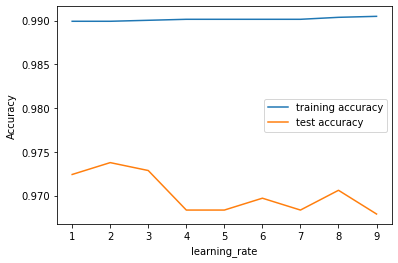

In [60]:
#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [61]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

In [62]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [63]:
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })


In [64]:
# dispalying total result
result


,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.924,0.933,0.947,0.927
1,K-Nearest Neighbors,0.944,0.950,0.962,0.996
2,Support Vector Machine,0.957,0.963,0.982,0.966
3,Naive Bayes Classifier,0.583,0.420,0.291,0.996
4,Decision Tree,0.958,0.963,0.992,0.991
5,Random Forest,0.961,0.966,0.992,0.989
6,Gradient Boosting Classifier,0.971,0.975,0.992,0.985
7,CatBoost Classifier,0.972,0.976,0.994,0.987


In [65]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [66]:
# dispalying total result
sorted_result


,ML Model,Accuracy,f1_score,Recall,Precision
0,CatBoost Classifier,0.972,0.976,0.994,0.987
1,Gradient Boosting Classifier,0.971,0.975,0.992,0.985
2,Random Forest,0.961,0.966,0.992,0.989
3,Decision Tree,0.958,0.963,0.992,0.991
4,Support Vector Machine,0.957,0.963,0.982,0.966
5,K-Nearest Neighbors,0.944,0.950,0.962,0.996
6,Logistic Regression,0.924,0.933,0.947,0.927
7,Naive Bayes Classifier,0.583,0.420,0.291,0.996


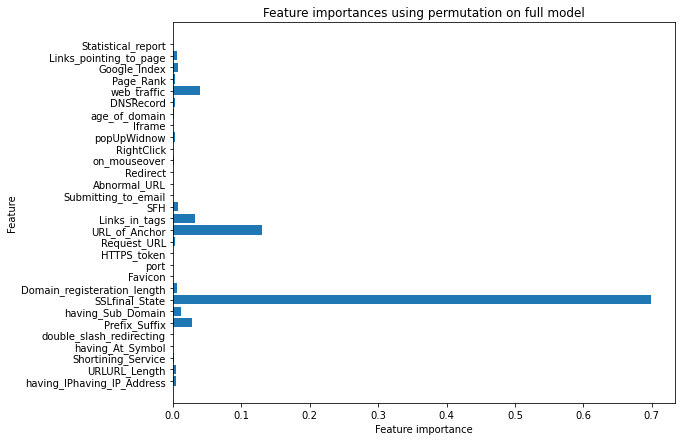

In [67]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# IBM DEPLOYEMENT

In [68]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.8 MB 13.5 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.255
    Uninstalling ibm-watson-machine-learning-1.0.255:
      Successfully uninstalled ibm-watson-machine-learning-1.0.255


In [69]:
from ibm_watson_machine_learning import APIClient
import json

# Authentication And Set Space

In [70]:
wml_credentials ={
    "apikey": "ihLwr2uokhHtIZYKQLCE_ADiHWqfvPivU52qNuMMarGA",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [72]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------  ------------------------
ID                                    NAME             CREATED
c91d4763-0542-44b5-b7e4-a0f6efcde81c  WebPhisingSpace  2022-11-08T10:04:35.486Z
------------------------------------  ---------------  ------------------------


In [73]:
SPACE_ID= "c91d4763-0542-44b5-b7e4-a0f6efcde81c"

In [74]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [75]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

# Save and Deploy the model

In [76]:
import sklearn
sklearn.__version__

'1.0.2'

In [87]:
MODEL_NAME = 'WebPhising'
DEPLOYMENT_NAME = 'WebPhisingSpace'
DEMO_MODEL =gbc

In [88]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [89]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [90]:
#Save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [91]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Result',
  'schemas': {'input': [{'fields': [{'name': 'having_IPhaving_IP_Address',
       'type': 'int64'},
      {'name': 'URLURL_Length', 'type': 'int64'},
      {'name': 'Shortining_Service', 'type': 'int64'},
      {'name': 'having_At_Symbol', 'type': 'int64'},
      {'name': 'double_slash_redirecting', 'type': 'int64'},
      {'name': 'Prefix_Suffix', 'type': 'int64'},
      {'name': 'having_Sub_Domain', 'type': 'int64'},
      {'name': 'SSLfinal_State', 'type': 'int64'},
      {'name': 'Domain_registeration_length', 'type': 'int64'},
      {'name': 'Favicon', 'type': 'int64'},
      {'name': 'port', 'type': 'int64'},
      {'name': 'HTTPS_token', 'type': 'int64'},
      {'name': 'Request_URL', 'type': 'int64'},
      {'name': 'URL_of_Anchor', 'type': 'int64'},
      {'name': 'Links_in_tags', 'type': 'int64'},
      {'name': 'SFH', 'type': 'int64'},
      {'name': 'Submitting_to_email', 'type': 'int64'},
      {

In [92]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'be5d1738-55e8-4e89-8c69-9bdbba7f8f9c'

In [93]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [94]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: 'be5d1738-55e8-4e89-8c69-9bdbba7f8f9c' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='a3ad9075-6686-4181-8a33-ddf1191ecd8d'
------------------------------------------------------------------------------------------------


